<a href="https://www.kaggle.com/code/manjitbaishya001/cross-domain-recommendation-system?scriptVersionId=230754943" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Cross Domain Recommendation System**
---

# **Importing Data**
---

In [1]:
# getting source file directories
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/douban-datasetratingreviewside-information/douban_dataset(text information)/moviereviews_cleaned.txt
/kaggle/input/douban-datasetratingreviewside-information/douban_dataset(text information)/books_cleaned.txt
/kaggle/input/douban-datasetratingreviewside-information/douban_dataset(text information)/users_cleaned.txt
/kaggle/input/douban-datasetratingreviewside-information/douban_dataset(text information)/music_cleaned.txt
/kaggle/input/douban-datasetratingreviewside-information/douban_dataset(text information)/bookreviews_cleaned.txt
/kaggle/input/douban-datasetratingreviewside-information/douban_dataset(text information)/musicreviews_cleaned.txt
/kaggle/input/douban-datasetratingreviewside-information/douban_dataset(text information)/movies_cleaned.txt


In [2]:
# importing necessaries libraries
import numpy as np
import pandas as pd

# declaring movie paths
movie_data_path = '/kaggle/input/douban-datasetratingreviewside-information/douban_dataset(text information)/moviereviews_cleaned.txt'
music_data_path = '/kaggle/input/douban-datasetratingreviewside-information/douban_dataset(text information)/musicreviews_cleaned.txt'
book_data_path = '/kaggle/input/douban-datasetratingreviewside-information/douban_dataset(text information)/bookreviews_cleaned.txt'

In [3]:
# importing movie data
movie_df = pd.read_csv(movie_data_path, sep='\t')
movie_df = movie_df[['user_id', 'movie_id', 'rating']]
movie_df.head()

,user_id,movie_id,rating
0,2349,21292,3
1,2349,34584,4
2,2349,3,5
3,2349,13510,3
4,2349,17317,4


In [4]:
# checking NULL values for movies dataset
movie_df.isna().sum()

user_id     0
movie_id    0
rating      0
dtype: int64

In [5]:
# importing music data
music_df = pd.read_csv(music_data_path, sep='\t')
music_df = music_df[['user_id', 'music_id', 'rating']]
music_df.head()

,user_id,music_id,rating
0,843,52381,5
1,843,52663,3
2,843,52032,5
3,843,18446,5
4,843,5380,5


In [6]:
# checking for NULL values for music dataset
music_df.isna().sum()

user_id     0
music_id    0
rating      0
dtype: int64

In [7]:
# importing book data
book_df = pd.read_csv(book_data_path, sep='\t')
book_df = book_df[['user_id', 'book_id', 'rating']]
book_df.head()

,user_id,book_id,rating
0,843,55947,3
1,843,81199,4
2,843,32934,4
3,843,62952,5
4,843,59291,4


In [8]:
# checking for NULL values in book dataset
book_df.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

# **Data Preprocessing**
---

## **Movie Dataset**

In [9]:
# creating the user-item matrix
movie_ui_matrix = movie_df.pivot_table(index='user_id', columns='movie_id', values='rating')
movie_ui_matrix = movie_ui_matrix.fillna(0)
movie_ui_matrix.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,34884,34885,34886,34887,34888,34889,34890,34891,34892,34893
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
movie_ui_matrix.shape

(2712, 34893)

### **Applying SVD**

In [11]:
from scipy.sparse.linalg import svds
from sklearn.metrics.pairwise import cosine_similarity

def svd_decomposition(ui_matrix, latent_features=50):
    
    # Convert to a NumPy array
    ui_matrix_array = ui_matrix.values

    # Perform SVD
    u, sigma, vt = svds(ui_matrix_array, k=latent_features)
    
    # Convert sigma to a diagonal matrix
    sigma_diag = np.diag(sigma)
    
    # Reconstruct the matrix
    reconstructed_matrix = np.dot(np.dot(u, sigma_diag), vt)
    
    # Convert back to DataFrame
    return pd.DataFrame(reconstructed_matrix, index=ui_matrix.index, columns=ui_matrix.columns)

In [12]:
# Apply SVD to movie dataset
latent_features = 50
movie_ui_matrix = svd_decomposition(movie_ui_matrix, latent_features=latent_features)
movie_ui_matrix.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,34884,34885,34886,34887,34888,34889,34890,34891,34892,34893
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.497379,1.154556,0.600610,1.653455,0.635960,0.625543,0.539113,1.842257,-0.046129,0.285033,...,-0.001251,0.005487,-0.003015,0.006842,-0.003768,-0.007972,-0.003015,-0.003015,0.004922,-0.002261
2,0.085422,0.026630,0.025877,0.024480,0.068848,0.032463,-0.002075,-0.100627,-0.004246,-0.000967,...,-0.000762,-0.007837,0.000294,0.001556,0.000367,0.000158,0.000294,0.000294,0.001429,0.000220
3,-0.396671,0.224031,-0.065261,0.153493,-0.166952,0.121425,0.060521,0.383127,-0.054830,-0.010147,...,0.003118,0.016141,-0.001672,-0.005754,-0.002090,-0.006642,-0.001672,-0.001672,-0.008529,-0.001254
4,0.009666,-0.057912,-0.025705,0.093728,0.027036,0.011242,0.026189,-0.002722,-0.027548,0.021837,...,-0.000315,-0.002473,-0.002051,0.001320,-0.002564,0.000733,-0.002051,-0.002051,0.000233,-0.001538
5,0.787885,0.040726,1.102855,1.926594,1.132111,1.082798,0.512818,-0.651135,1.268610,0.589176,...,0.016355,0.032084,-0.007198,-0.006347,-0.008998,0.024806,-0.007198,-0.007198,0.010455,-0.005399


### **Generating User-User Similarity Matrix**

In [13]:
# calculating user-user similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

movie_user_sim = cosine_similarity(movie_ui_matrix)
movie_user_sim_df = pd.DataFrame(movie_user_sim, index=movie_ui_matrix.index, columns=movie_ui_matrix.index)
movie_user_sim_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,2709,2710,2711,2712,2713,2714,2715,2716,2717,2718
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.538968,0.228647,0.275586,0.248605,0.541707,0.468843,0.449855,0.389616,0.599003,...,0.281798,0.566805,0.688315,0.299009,0.424682,0.510612,0.527812,0.659330,0.584168,0.588911
2,0.538968,1.000000,0.114147,0.090313,0.317830,0.596185,0.337233,0.488825,0.337457,0.491395,...,0.283775,0.553701,0.347907,0.364532,0.286321,0.589472,0.708642,0.775707,0.401777,0.483079
3,0.228647,0.114147,1.000000,0.663448,0.339006,0.406467,0.059464,0.463587,0.358415,0.242287,...,0.431529,0.552000,0.314515,0.655533,0.679845,0.412694,0.404810,0.389707,0.520679,0.397321
4,0.275586,0.090313,0.663448,1.000000,0.094150,0.253448,-0.025117,0.208336,0.091586,0.131845,...,0.149500,0.450278,0.340047,0.304966,0.531208,0.212087,0.268044,0.250025,0.475866,0.248032
5,0.248605,0.317830,0.339006,0.094150,1.000000,0.454720,-0.008422,0.513049,0.384661,0.496631,...,0.802985,0.270115,0.443256,0.578108,0.427833,0.502817,0.504591,0.393672,0.445256,0.377956


### **Calculating RMSE and MAE for ratings**

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Convert the user-item matrix to a long format for splitting
user_item_df = movie_ui_matrix.stack().reset_index()
user_item_df.columns = ['user_id', 'item_id', 'rating']

In [15]:
def predict_rating(user_id, item_id, ui_matrix, similarity_matrix):
    # Get users who rated the item
    users_who_rated = ui_matrix[item_id].dropna().index
    
    # Get similarities and ratings of these users
    similarities = similarity_matrix.loc[user_id, users_who_rated]
    ratings = ui_matrix.loc[users_who_rated, item_id]
    
    # Weighted sum of ratings
    numerator = (similarities * ratings).sum()
    denominator = similarities.sum()
    
    if denominator == 0:
        return ui_matrix.mean().mean()  # Fallback to global mean if no neighbors
    return numerator / denominator

In [16]:
user_item_df.shape

(94629816, 3)

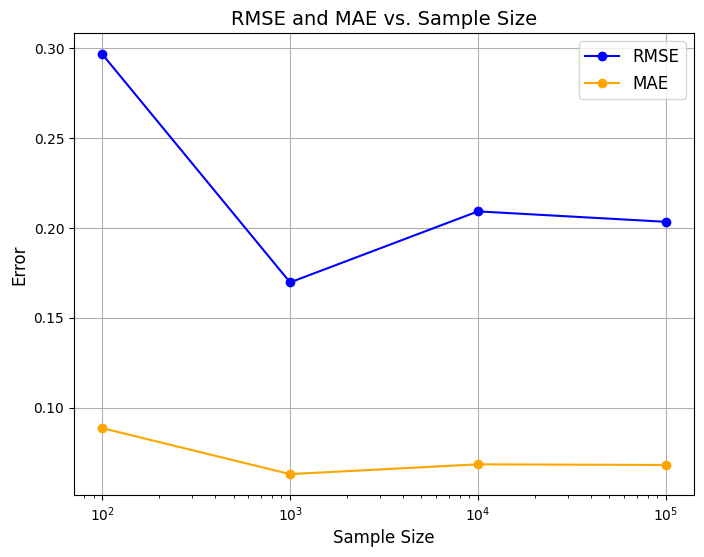

In [17]:
import matplotlib.pyplot as plt

samples = [100, 1000, 10000, 100000]
rmse = []
mae = []

for sample in samples:
    
    # Randomly sample 100 data points from the test set
    random_samples = user_item_df.sample(n=sample, random_state=42)
    
    # Predict ratings for the random sample
    random_samples['predicted_rating'] = random_samples.apply(
        lambda row: predict_rating(row['user_id'], row['item_id'], movie_ui_matrix, movie_user_sim_df), axis=1
    )
    
    # Calculate RMSE and MAE
    rmse.append(np.sqrt(mean_squared_error(random_samples['rating'], random_samples['predicted_rating']))) 
    mae.append(mean_absolute_error(random_samples['rating'], random_samples['predicted_rating'])) 


# Plotting RMSE and MAE on the same line plot
plt.figure(figsize=(8, 6))
plt.plot(samples, rmse, marker='o', color='blue', label='RMSE')
plt.plot(samples, mae, marker='o', color='orange', label='MAE')

# Adding labels, title, and legend
plt.xlabel('Sample Size', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('RMSE and MAE vs. Sample Size', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xscale('log')

# Display the plot
plt.show()

In [18]:
# Print the error values for 10^5 samples
print(f"RMSE at 10^5 samples: {rmse[-1]:.4f}")
print(f"MAE at 10^5 samples: {mae[-1]:.4f}")

RMSE at 10^5 samples: 0.2034
MAE at 10^5 samples: 0.0681


## **Music Dataset**

In [19]:
# creating the user-item matrix
music_ui_matrix = music_df.pivot_table(index='user_id', columns='music_id', values='rating')
music_ui_matrix = music_ui_matrix.fillna(0)
music_ui_matrix.head()

music_id,1,2,3,4,5,6,7,8,9,10,...,79869,79870,79871,79872,79873,79874,79875,79876,79877,79878
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
music_ui_matrix.shape

(1820, 79878)

In [21]:
# calculating user-user similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

music_user_sim = cosine_similarity(music_ui_matrix)
music_user_sim_df = pd.DataFrame(music_user_sim, index=music_ui_matrix.index, columns=music_ui_matrix.index)
music_user_sim_df.head()

user_id,2,5,8,11,13,18,19,23,25,30,...,2708,2709,2710,2711,2712,2713,2714,2715,2717,2718
user_id,,,,,,,,,,,,,,,,,,,,,
2,1.0,0.0,0.0,0.0,0.0,0.0,0.033227,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.024244,0.0,0.028304,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.086977,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.033832,0.015389,0.0,0.011122,0.0,0.0
11,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
13,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.017944,...,0.0,0.0,0.0,0.0,0.009601,0.017120,0.0,0.012120,0.0,0.0


In [22]:
# Apply SVD to music dataset
latent_features = 50
music_ui_matrix = svd_decomposition(music_ui_matrix, latent_features=latent_features)
music_ui_matrix.head()

music_id,1,2,3,4,5,6,7,8,9,10,...,79869,79870,79871,79872,79873,79874,79875,79876,79877,79878
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.002250,0.001612,-0.000055,0.006230,-0.001053,-0.002268,-0.000472,0.006442,-0.001361,0.001902,...,0.001042,0.021031,-0.000445,-0.000354,-0.000354,0.000157,0.000315,0.000288,0.035640,-0.000632
5,-0.001011,0.000029,-0.000006,-0.001127,-0.000356,-0.001031,-0.000202,-0.000865,-0.000618,0.000388,...,-0.009459,-0.000837,0.000071,-0.000152,-0.000152,-0.000435,-0.000869,-0.000038,0.010478,-0.000043
8,0.001112,-0.000901,-0.000108,0.008279,-0.003959,0.000153,0.001091,0.008707,0.000092,-0.002477,...,0.152725,0.014921,0.002228,0.000818,0.000818,0.004544,0.009088,0.004232,-0.021928,-0.000395
11,-0.000192,0.000161,-0.000005,-0.000045,0.000003,-0.000214,-0.000004,-0.000036,-0.000128,0.000005,...,-0.000242,-0.000693,0.000002,-0.000003,-0.000003,-0.000012,-0.000025,-0.000038,-0.001149,0.000267
13,-0.000568,0.000458,-0.000118,0.003320,-0.002302,0.006111,-0.001926,0.003769,0.003667,-0.001697,...,-0.020472,0.004146,-0.000036,-0.001445,-0.001445,-0.001686,-0.003372,-0.001353,0.004566,-0.002727


In [23]:
# Convert the user-item matrix to a long format for splitting
user_item_df = music_ui_matrix.stack().reset_index()
user_item_df.columns = ['user_id', 'item_id', 'rating']

In [24]:
user_item_df.shape

(145377960, 3)

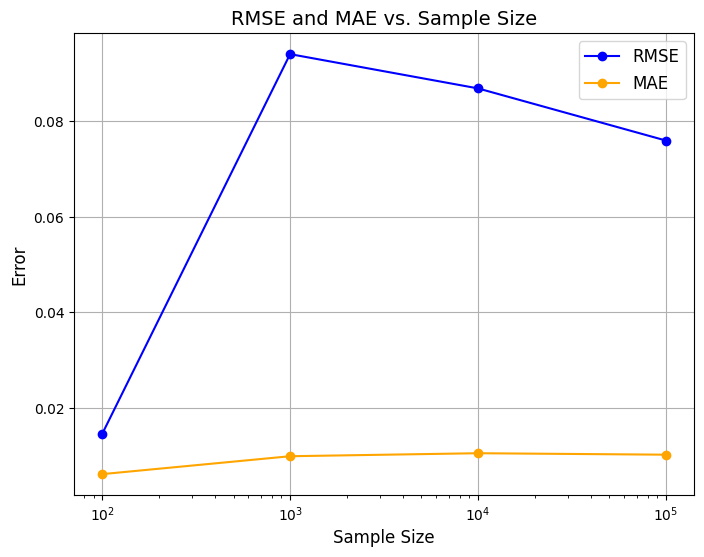

In [25]:
samples = [100, 1000, 10000, 100000]
rmse = []
mae = []

for sample in samples:
    
    # Randomly sample 100 data points from the test set
    random_samples = user_item_df.sample(n=sample, random_state=42)
    
    # Predict ratings for the random sample
    random_samples['predicted_rating'] = random_samples.apply(
        lambda row: predict_rating(row['user_id'], row['item_id'], music_ui_matrix, music_user_sim_df), axis=1
    )
    
    # Calculate RMSE and MAE
    rmse.append(np.sqrt(mean_squared_error(random_samples['rating'], random_samples['predicted_rating']))) 
    mae.append(mean_absolute_error(random_samples['rating'], random_samples['predicted_rating'])) 


# Plotting RMSE and MAE on the same line plot
plt.figure(figsize=(8, 6))
plt.plot(samples, rmse, marker='o', color='blue', label='RMSE')
plt.plot(samples, mae, marker='o', color='orange', label='MAE')

# Adding labels, title, and legend
plt.xlabel('Sample Size', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('RMSE and MAE vs. Sample Size', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xscale('log')

# Display the plot
plt.show()

In [26]:
# Print the error values for 10^5 samples
print(f"RMSE at 10^5 samples: {rmse[-1]:.4f}")
print(f"MAE at 10^5 samples: {mae[-1]:.4f}")

RMSE at 10^5 samples: 0.0760
MAE at 10^5 samples: 0.0102


## **Book Dataset**

In [27]:
# creating the user-item matrix
book_ui_matrix = book_df.pivot_table(index='user_id', columns='book_id', values='rating')
book_ui_matrix = book_ui_matrix.fillna(0)
book_ui_matrix.head()

book_id,1,2,3,4,5,6,7,8,9,10,...,95865,95866,95867,95868,95869,95870,95871,95872,95873,95874
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
book_ui_matrix.shape

(2212, 95872)

In [29]:
# calculating user-user similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

book_user_sim = cosine_similarity(book_ui_matrix)
book_user_sim_df = pd.DataFrame(book_user_sim, index=book_ui_matrix.index, columns=book_ui_matrix.index)
book_user_sim_df.head()

user_id,1,2,3,5,6,8,9,10,11,13,...,2708,2709,2710,2711,2712,2713,2714,2715,2717,2718
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.067966,0.000000,0.000000,0.020674,0.000000,0.000000,0.0,0.0,0.202707,0.0
2,0.0,1.0,0.0,0.0,0.0,0.000000,0.018532,0.0,0.0,0.0,...,0.030510,0.000000,0.000000,0.016241,0.027966,0.000000,0.0,0.0,0.053080,0.0
3,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.023104,0.000000,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,1.0,0.0,0.029048,0.000000,0.0,0.0,0.0,...,0.000000,0.023057,0.051562,0.019400,0.041572,0.014811,0.0,0.0,0.000000,0.0
6,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [30]:
# Apply SVD to music dataset
latent_features = 50
music_ui_matrix = svd_decomposition(music_ui_matrix, latent_features=latent_features)
music_ui_matrix.head()

music_id,1,2,3,4,5,6,7,8,9,10,...,79869,79870,79871,79872,79873,79874,79875,79876,79877,79878
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.002250,0.001612,-0.000055,0.006230,-0.001053,-0.002268,-0.000472,0.006442,-0.001361,0.001902,...,0.001042,0.021031,-0.000445,-0.000354,-0.000354,0.000157,0.000315,0.000288,0.035640,-0.000632
5,-0.001011,0.000029,-0.000006,-0.001127,-0.000356,-0.001031,-0.000202,-0.000865,-0.000618,0.000388,...,-0.009459,-0.000837,0.000071,-0.000152,-0.000152,-0.000435,-0.000869,-0.000038,0.010478,-0.000043
8,0.001112,-0.000901,-0.000108,0.008279,-0.003959,0.000153,0.001091,0.008707,0.000092,-0.002477,...,0.152725,0.014921,0.002228,0.000818,0.000818,0.004544,0.009088,0.004232,-0.021928,-0.000395
11,-0.000192,0.000161,-0.000005,-0.000045,0.000003,-0.000214,-0.000004,-0.000036,-0.000128,0.000005,...,-0.000242,-0.000693,0.000002,-0.000003,-0.000003,-0.000012,-0.000025,-0.000038,-0.001149,0.000267
13,-0.000568,0.000458,-0.000118,0.003320,-0.002302,0.006111,-0.001926,0.003769,0.003667,-0.001697,...,-0.020472,0.004146,-0.000036,-0.001445,-0.001445,-0.001686,-0.003372,-0.001353,0.004566,-0.002727


In [31]:
# Convert the user-item matrix to a long format for splitting
user_item_df = book_ui_matrix.stack().reset_index()
user_item_df.columns = ['user_id', 'item_id', 'rating']

In [32]:
user_item_df.shape

(212068864, 3)

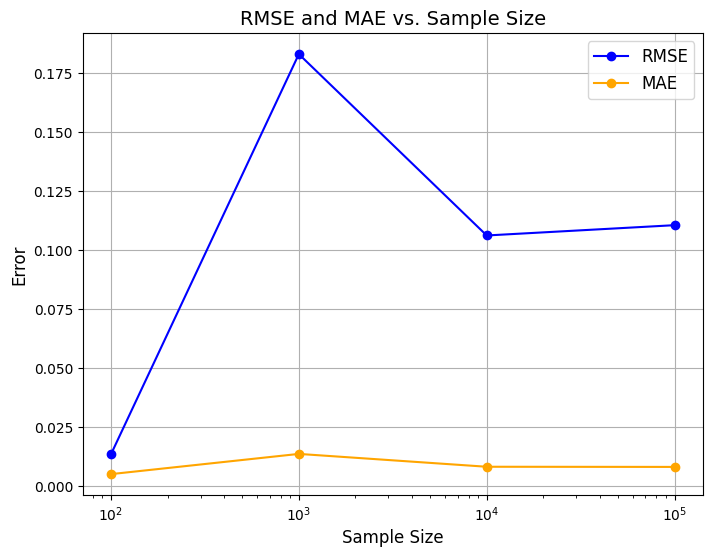

In [33]:
samples = [100, 1000, 10000, 100000]
rmse = []
mae = []

for sample in samples:
    
    # Randomly sample 100 data points from the test set
    random_samples = user_item_df.sample(n=sample, random_state=42)
    
    # Predict ratings for the random sample
    random_samples['predicted_rating'] = random_samples.apply(
        lambda row: predict_rating(row['user_id'], row['item_id'], book_ui_matrix, book_user_sim_df), axis=1
    )
    
    # Calculate RMSE and MAE
    rmse.append(np.sqrt(mean_squared_error(random_samples['rating'], random_samples['predicted_rating']))) 
    mae.append(mean_absolute_error(random_samples['rating'], random_samples['predicted_rating'])) 


# Plotting RMSE and MAE on the same line plot
plt.figure(figsize=(8, 6))
plt.plot(samples, rmse, marker='o', color='blue', label='RMSE')
plt.plot(samples, mae, marker='o', color='orange', label='MAE')

# Adding labels, title, and legend
plt.xlabel('Sample Size', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('RMSE and MAE vs. Sample Size', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xscale('log')

# Display the plot
plt.show()

In [34]:
# Print the error values for 10^5 samples
print(f"RMSE at 10^5 samples: {rmse[-1]:.4f}")
print(f"MAE at 10^5 samples: {mae[-1]:.4f}")

RMSE at 10^5 samples: 0.1106
MAE at 10^5 samples: 0.0081


In [35]:
# restructuring the user_item matrix into original format
movie_ui_matrix = movie_df.pivot_table(index='user_id', columns='movie_id', values='rating')
movie_ui_matrix = movie_ui_matrix.fillna(0)

music_ui_matrix = music_df.pivot_table(index='user_id', columns='music_id', values='rating')
music_ui_matrix = music_ui_matrix.fillna(0)

book_ui_matrix = book_df.pivot_table(index='user_id', columns='book_id', values='rating')
book_ui_matrix = book_ui_matrix.fillna(0)

# **Engine Design**

In [36]:
# getting most similar users
def get_most_simliar_users(user_id, user_user_matrix, k=5):

    # most similar user will be itself, so we skip that
    similar_users = user_user_matrix[user_id].sort_values(ascending=False).index[1:k+1]
    return similar_users

In [37]:
# checking the function
print(get_most_simliar_users(132, movie_user_sim_df))
print(get_most_simliar_users(132, music_user_sim_df))
print(get_most_simliar_users(132, book_user_sim_df))

Index([1260, 1490, 1779, 1894, 2621], dtype='int64', name='user_id')
Index([2465, 23, 1201, 880, 194], dtype='int64', name='user_id')
Index([271, 260, 779, 885, 156], dtype='int64', name='user_id')


In [38]:
# getting similar users across 3 domains if available
domains = {
    "movie": movie_user_sim_df,
    "music": music_user_sim_df,
    "book": book_user_sim_df
}

def get_domain_specific_similar_users(user_id):
    similar_users = []
    
    # Iterate through each domain and DataFrame pair
    for domain, df in domains.items():
        if user_id in df:
            similar_users.extend(get_most_simliar_users(user_id, df))
    
    return similar_users

In [39]:
# checking function
similar_users = get_domain_specific_similar_users(142)
similar_users

[1458, 795, 1465, 1348, 980]

In [40]:
# getting user based recomendations for the target domain
def get_user_based_recommendations(user_id, target_ui_matrix, n_recommendations=5):
    recommended_movies = []
    watched_movies = []
    
    if user_id in target_ui_matrix.index:
        watched_movies = target_ui_matrix.loc[user_id][target_ui_matrix.loc[user_id] != 0].index

    similar_users = get_domain_specific_similar_users(user_id)

    for user in similar_users:

        # Check if the similar user is in the user-item matrix
        if user in target_ui_matrix.index:
            sim_user_ratings = target_ui_matrix.loc[user]
            highly_rated_movies = sim_user_ratings[sim_user_ratings >= 3]
            
            # Filter out movies already watched by the target user
            recommendations = highly_rated_movies[~highly_rated_movies.index.isin(watched_movies)]
            recommended_movies.extend(recommendations.index.tolist())

    # Return the top n recommendations
    return recommended_movies[:n_recommendations]

In [41]:
# testing function
print(get_user_based_recommendations(120, book_ui_matrix))

[246, 525, 773, 1211, 2018]
